# Import Some Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.sample(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4908519,349,PAYMENT,79289.89,C160979157,44954.00,0.00,M2025444393,0.00,0.00,0,0
2188517,185,PAYMENT,31474.99,C1720627117,622639.35,591164.37,M1211537143,0.00,0.00,0,0
5295474,373,CASH_OUT,103254.70,C1759738872,150517.00,47262.30,C1886631793,0.00,103254.70,0,0
4717071,332,CASH_OUT,381818.75,C1287136580,0.00,0.00,C736651297,1213846.21,1595664.96,0,0
1598120,156,CASH_OUT,121503.73,C635459303,0.00,0.00,C38859699,5642230.48,5763734.21,0,0
289670,15,CASH_OUT,14327.39,C472956843,25256.00,10928.61,C1407472437,3407821.08,3422148.47,0,0
4872695,348,PAYMENT,22051.34,C520647613,0.00,0.00,M1366484804,0.00,0.00,0,0


# Exploratory Data Analysis

In [3]:
df.shape

(6362620, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking For Outliers

In [7]:
from sklearn.preprocessing import StandardScaler
# Handle outliers, using Z-score for numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df_outliers = df[(z_scores >3).all(axis=1)]  # Adjust the threshold as needed

In [8]:
if df_outliers.empty:
    print("No outliers found.")
else:
    print(df_outliers)

No outliers found.


## Checking for missing values 

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

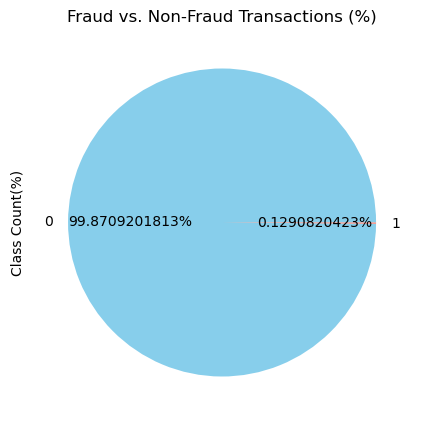

In [12]:
plt.figure(figsize=(5, 5))
fraud_percentage = (df.groupby('isFraud')['isFraud'].count() / df['isFraud'].count()) * 100
fraud_percentage.plot.pie(title="Fraud vs. Non-Fraud Transactions (%)", autopct='%.10f%%', colors=['skyblue', 'salmon'])
plt.ylabel("Class Count(%)")
plt.show()

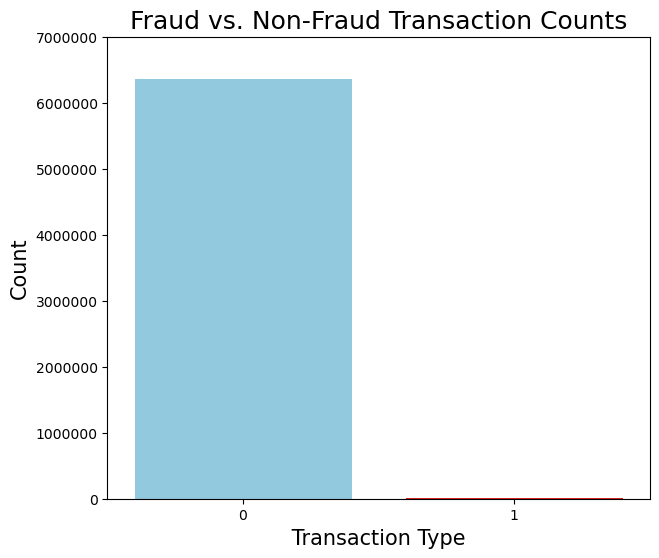

In [13]:
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(7, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["skyblue", "red"])
plt.title("Fraud vs. Non-Fraud Transaction Counts",fontsize=18)
plt.xlabel(" Transaction Type ",fontsize=15)
plt.ylabel("Count",fontsize=15)
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{int(y):}' for y in y_ticks])
plt.show()

In [14]:
df["type"].nunique()

5

In [15]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [16]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### The feature "type" is a categorical feature. So we convert it into numerical column by using Label Encoder.

In [17]:
data = df.copy(deep = True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(data['type'])
data['type']=le.fit_transform(data['type'])

In [19]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [20]:
data['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

CASH_IN=0, CASH_OUT=1, DEBIT=2, PAYMENT=3, TRANSFER=4

The features 'nameOrig' and 'nameDest' contains information of the sender and receiver of the corresponding transaction. Also the 'isFlaggedFraud' column is 1 for a transaction more than 200000 raised by the business model. We drop these columns from the dataset and make a new dataset named 'data' so that the original dataset 'df' remains unaltered. We shall use 'data' for our next operations:

In [21]:
data.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


# Data Visualization

<Figure size 1500x1000 with 0 Axes>

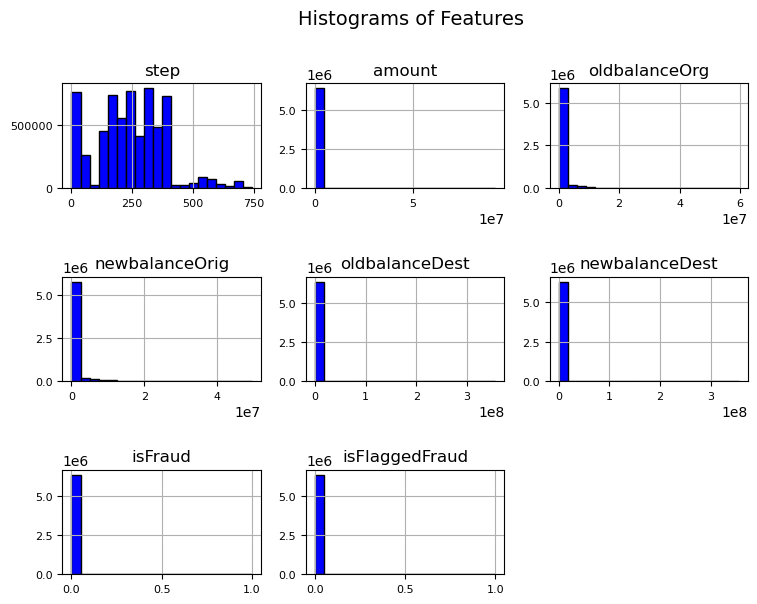

In [22]:
# Plot histograms of features
plt.figure(figsize=(15, 10))
df.hist(bins=20, color='blue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Histograms of Features', x=0.65, y=1.25, fontsize=14)
plt.show()

In [23]:
corr=data.corr()
corr

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


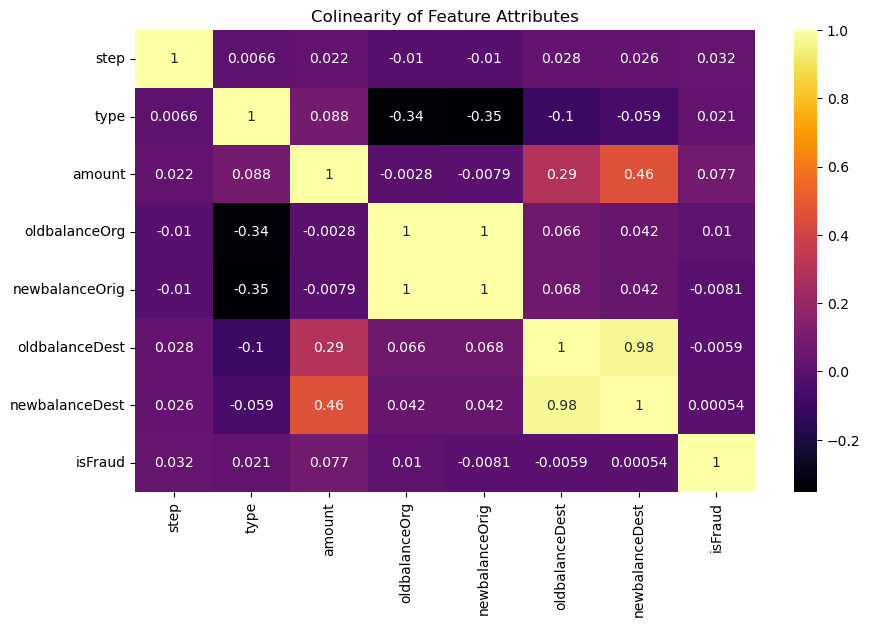

In [24]:
plt.figure(figsize=(10, 6))  # Optional: set figure size
sns.heatmap(corr, annot=True, cmap='inferno')
plt.title("Colinearity of Feature Attributes")
plt.show()

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

x = data.drop('isFraud', axis=1)
y = data.isFraud

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=30)

In [26]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
3465451,257,0,459.08,10748259.42,10748718.49,610422.71,609963.63
657060,35,1,167848.37,0.00,0.00,928522.28,1249511.26
5632889,395,3,12711.86,450.78,0.00,0.00,0.00
5557668,383,3,1651.49,201.00,0.00,0.00,0.00
2110477,183,3,13349.75,11079.00,0.00,0.00,0.00


In [27]:
y_train.head()

3465451    0
657060     0
5632889    0
5557668    0
2110477    0
Name: isFraud, dtype: int64

In [28]:
x_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
4639499,330,1,188936.35,15111.0,0.0,32065.94,221002.29
5445705,379,1,192082.17,1087.0,0.0,183022.73,375104.90
5121887,356,0,60060.60,100587.0,160647.6,0.00,0.00
2763617,213,1,75411.27,6350.0,0.0,140845.17,216256.44
5696836,397,1,153023.05,0.0,0.0,710141.71,863164.76


In [29]:
y_test.head()

4639499    0
5445705    0
5121887    0
2763617    0
5696836    0
Name: isFraud, dtype: int64

## Logistic Regression

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)

In [31]:
x_test_sc=scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr1=LogisticRegression().fit(x_train,y_train)
lr.fit(x_train_sc,y_train)

LogisticRegression()

In [33]:
y_pred=lr.predict(x_test_sc)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
y_test

4639499    0
5445705    0
5121887    0
2763617    0
5696836    0
          ..
601722     0
2268822    0
4503628    0
5286892    0
4902652    0
Name: isFraud, Length: 1590655, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
print("-------------------------Logistic Regression---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lr1.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Logistic Regression---------------------------

Confusion Matrix:
 [[1588540      84]
 [   1184     847]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588624
           1       0.91      0.42      0.57      2031

    accuracy                           1.00   1590655
   macro avg       0.95      0.71      0.79   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy Score: 0.999202844111388
ROC-AUC Score: 0.8731286060086129
________________________________________________________________________


In [36]:
print("-------------------------Logistic Regression---------------------------")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lr1.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Logistic Regression---------------------------
Accuracy: 0.999202844111388
Precision: 0.9097744360902256
Recall: 0.4170359428852782
F1 Score: 0.5719108710330858
ROC-AUC Score: 0.8731286060086129
________________________________________________________________________


In [37]:
from sklearn.metrics import roc_curve
y_pred_lr_proba = lr1.predict_proba(x_test)[::,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test,  y_pred_lr_proba)
auc_lr = roc_auc_score(y_test, y_pred_lr_proba)
print("AUC for logistic regression :", auc_lr)

AUC for logistic regression : 0.8731286060086129


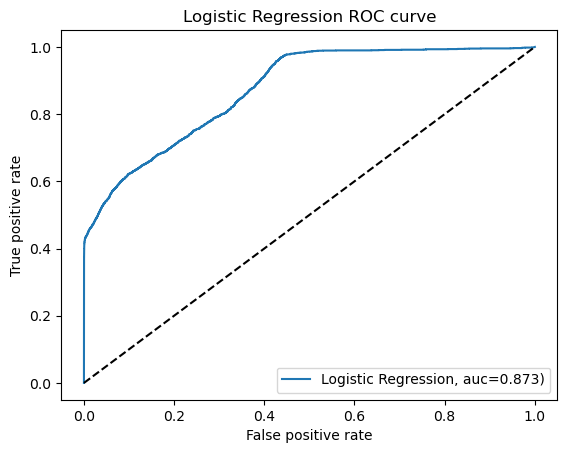

In [38]:
#ROC
plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, auc={:.3f})".format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

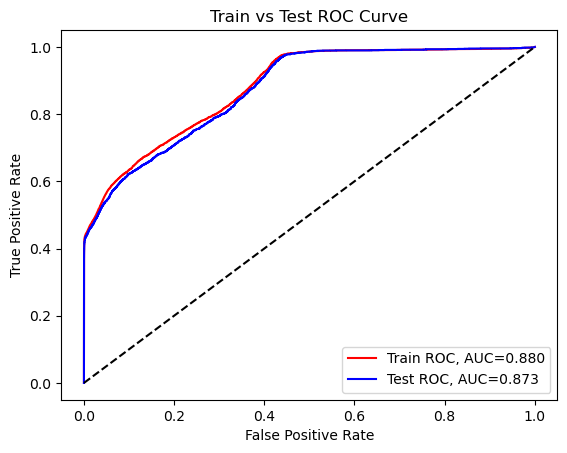

In [39]:
# Predictions for test set
y_pred_test_proba = lr1.predict_proba(x_test)[::, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
auc_test = roc_auc_score(y_test, y_pred_test_proba)

# Predictions for train set
y_pred_train_proba = lr1.predict_proba(x_train)[::, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
auc_train = roc_auc_score(y_train, y_pred_train_proba)

# Plotting the ROC curves
plt.plot(fpr_train, tpr_train, label="Train ROC, AUC={:.3f}".format(auc_train), color='red')
plt.plot(fpr_test, tpr_test, label="Test ROC, AUC={:.3f}".format(auc_test), color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test ROC Curve')
plt.legend(loc=4)
plt.show()

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit (x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_test

4639499    0
5445705    0
5121887    0
2763617    0
5696836    0
          ..
601722     0
2268822    0
4503628    0
5286892    0
4902652    0
Name: isFraud, Length: 1590655, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report, confusion_matrix
print("-------------------------Decision Tree---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Decision Tree---------------------------

Confusion Matrix:
 [[1588441     183]
 [    237    1794]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588624
           1       0.91      0.88      0.90      2031

    accuracy                           1.00   1590655
   macro avg       0.95      0.94      0.95   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy Score: 0.9997359578286932
ROC-AUC Score: 0.9415967604446046
________________________________________________________________________


In [44]:
print("-------------------------Decision Tree---------------------------")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, dt.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Decision Tree---------------------------
Accuracy: 0.9997359578286932
Precision: 0.9074355083459787
Recall: 0.8833087149187593
F1 Score: 0.8952095808383234
ROC-AUC Score: 0.9415967604446046
________________________________________________________________________


In [45]:
from sklearn.metrics import roc_curve
y_pred_dt_proba = dt.predict_proba(x_test)[::,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test,  y_pred_dt_proba)
auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
print("AUC for Decision Tree :", auc_dt)

AUC for Decision Tree : 0.9415967604446046


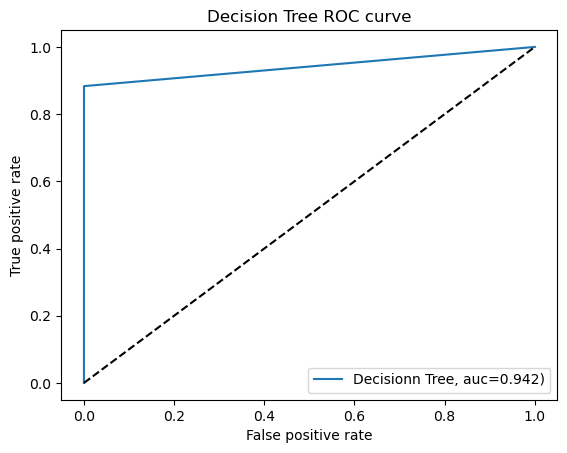

In [46]:
#ROC
plt.plot(fpr_dt,tpr_dt,label="Decisionn Tree, auc={:.3f})".format(auc_dt))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree ROC curve')
plt.legend(loc=4)
plt.show()

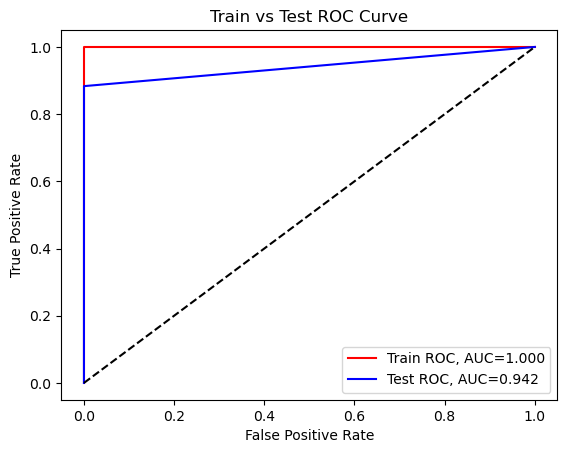

In [47]:
# Predictions for test set
y_pred_test_proba = dt.predict_proba(x_test)[::, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
auc_test = roc_auc_score(y_test, y_pred_test_proba)

# Predictions for train set
y_pred_train_proba = dt.predict_proba(x_train)[::, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
auc_train = roc_auc_score(y_train, y_pred_train_proba)

# Plotting the ROC curves
plt.plot(fpr_train, tpr_train, label="Train ROC, AUC={:.3f}".format(auc_train), color='red')
plt.plot(fpr_test, tpr_test, label="Test ROC, AUC={:.3f}".format(auc_test), color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test ROC Curve')
plt.legend(loc=4)
plt.show()

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20, random_state = 42, n_jobs=-1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)

In [49]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
y_test

4639499    0
5445705    0
5121887    0
2763617    0
5696836    0
          ..
601722     0
2268822    0
4503628    0
5286892    0
4902652    0
Name: isFraud, Length: 1590655, dtype: int64

In [51]:
print("-------------------------Random Forest---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Random Forest---------------------------

Confusion Matrix:
 [[1588591      33]
 [    432    1599]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588624
           1       0.98      0.79      0.87      2031

    accuracy                           1.00   1590655
   macro avg       0.99      0.89      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655

Accuracy Score: 0.9997076675960532
ROC-AUC Score: 0.9809181038756213
________________________________________________________________________


In [52]:
print("-------------------------Random Forest---------------------------")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Random Forest---------------------------
Accuracy: 0.9997076675960532
Precision: 0.9797794117647058
Recall: 0.7872968980797637
F1 Score: 0.8730548730548731
ROC-AUC Score: 0.9809181038756213
________________________________________________________________________


In [53]:
from sklearn.metrics import roc_curve
y_pred_rf_proba = rf.predict_proba(x_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test,  y_pred_rf_proba)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
print("AUC for Random forest:", auc_rf)

AUC for Random forest: 0.9809181038756213


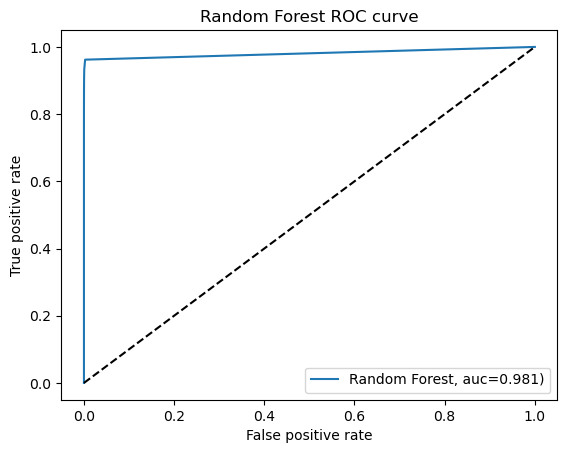

In [54]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

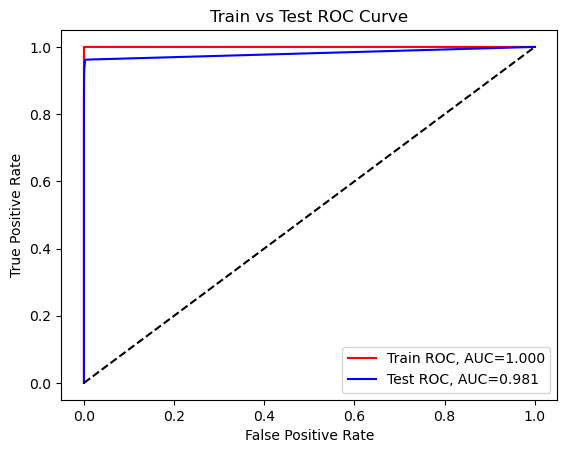

In [55]:
# Predictions for test set
y_pred_test_proba = rf.predict_proba(x_test)[::, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
auc_test = roc_auc_score(y_test, y_pred_test_proba)

# Predictions for train set
y_pred_train_proba = rf.predict_proba(x_train)[::, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
auc_train = roc_auc_score(y_train, y_pred_train_proba)

# Plotting the ROC curves
plt.plot(fpr_train, tpr_train, label="Train ROC, AUC={:.3f}".format(auc_train), color='red')
plt.plot(fpr_test, tpr_test, label="Test ROC, AUC={:.3f}".format(auc_test), color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Train vs Test ROC Curve')
plt.legend(loc=4)
plt.show()

Feature importance ranking


1.newbalanceDest(0.307505)
2.oldbalanceOrg(0.282269)
3.amount(0.154356)
4.step(0.093653)
5.oldbalanceDest(0.085675)
6.type(0.052794)
7.newbalanceOrig(0.023748)


<BarContainer object of 7 artists>

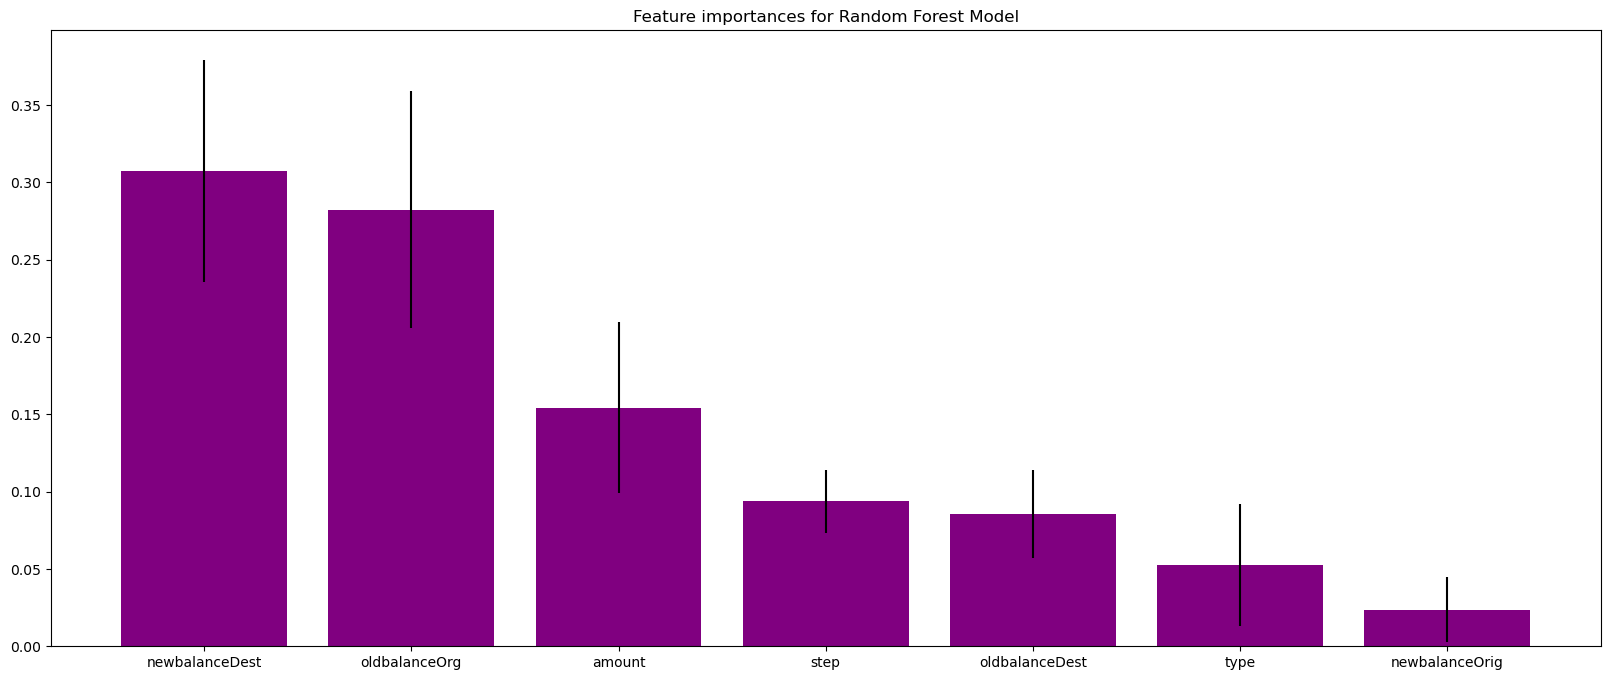

In [56]:
#Plotting Feature Importances
print('Feature importance ranking\n\n')
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = data.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances for Random Forest Model")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')

# Undersampling

In [57]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5)
x_under, y_under = rus.fit_resample(x, y)
data_under = pd.concat([x_under, y_under], axis=1)

In [58]:
data_under['isFraud'].value_counts()

isFraud
0    16426
1     8213
Name: count, dtype: int64

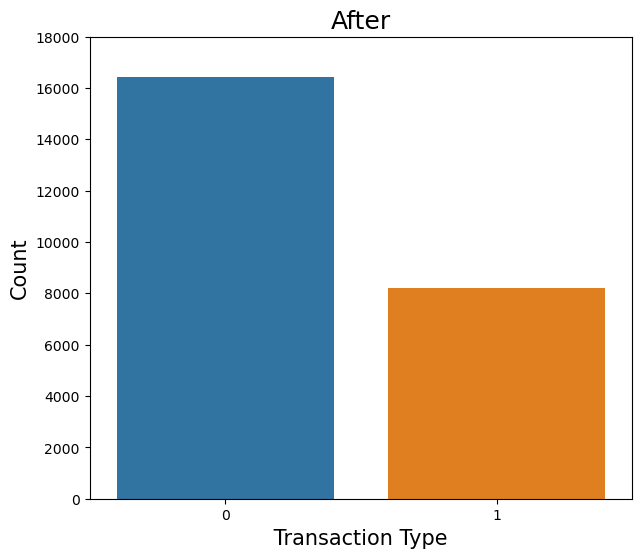

In [59]:
fraud_counts = data_under['isFraud'].value_counts()
plt.figure(figsize=(7, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=["#1f77b4", "#ff7f00"])
plt.title("After",fontsize=18)
plt.xlabel(" Transaction Type ",fontsize=15)
plt.ylabel("Count",fontsize=15)
y_ticks = plt.yticks()[0]
plt.yticks(y_ticks, [f'{int(y):}' for y in y_ticks])
plt.show()

Text(0.5, 1.0, 'After')

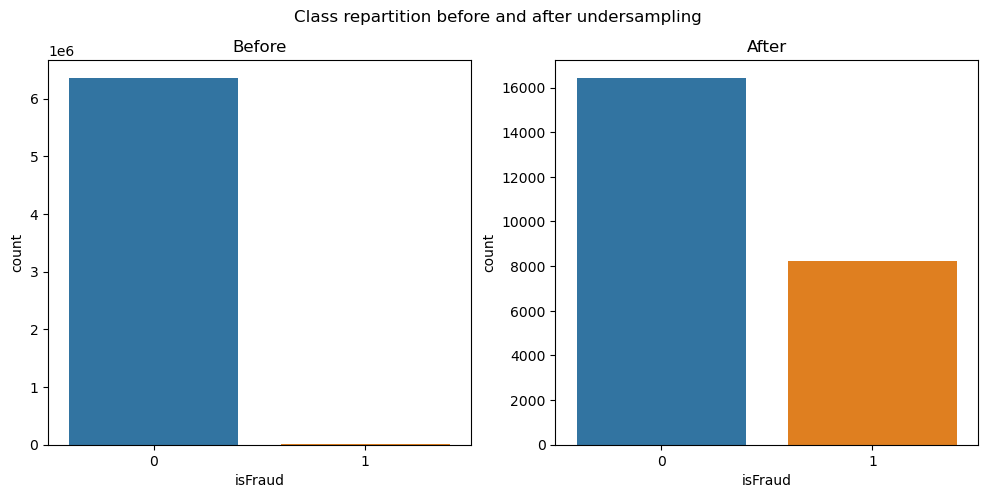

In [60]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.countplot(x="isFraud", data=data, ax=axs[0], palette=["#1f77b4", "#ff7f00"])
sns.countplot(x="isFraud", data=data_under, ax=axs[1], palette=["#1f77b4", "#ff7f00"])

fig.suptitle("Class repartition before and after undersampling\n")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(x_under, y_under, random_state = 42, test_size=0.25)

## Logistic Regression after Undersampling

In [62]:
X_train_sc=scaler.fit_transform(X_train)

In [63]:
X_test_sc=scaler.transform(X_test)

In [64]:
lr_under=LogisticRegression()
lr_under.fit(X_train_sc,Y_train)

LogisticRegression()

In [65]:
Y_pred=lr_under.predict(X_test_sc)
Y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [66]:
Y_test

1640843    1
6272956    1
283086     0
2270646    0
6100674    1
          ..
6362522    1
1696421    0
3192026    1
6294065    1
4782094    1
Name: isFraud, Length: 6160, dtype: int64

In [67]:
print("-------------------------Logistic Regression---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\n Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, lr_under.predict_proba(X_test_sc)[:, 1]))
print("________________________________________________________________________")

-------------------------Logistic Regression---------------------------

Confusion Matrix:
 [[4098   22]
 [ 531 1509]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      4120
           1       0.99      0.74      0.85      2040

    accuracy                           0.91      6160
   macro avg       0.94      0.87      0.89      6160
weighted avg       0.92      0.91      0.91      6160

Accuracy Score: 0.9102272727272728
ROC-AUC Score: 0.9509588568437084
________________________________________________________________________


In [68]:
print("-------------------------Logistic Regression---------------------------")
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("Precision:", precision_score(Y_test,Y_pred))
print("Recall:", recall_score(Y_test,Y_pred))
print("F1 Score:", f1_score(Y_test,Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, lr_under.predict_proba(X_test_sc)[:, 1]))
print("________________________________________________________________________")

-------------------------Logistic Regression---------------------------
Accuracy: 0.9102272727272728
Precision: 0.9856303069888962
Recall: 0.7397058823529412
F1 Score: 0.8451414169700364
ROC-AUC Score: 0.9509588568437084
________________________________________________________________________


## Decision Tree after Undersampling

In [69]:
dt_under = DecisionTreeClassifier()
dt_under.fit (X_train,Y_train)

DecisionTreeClassifier()

In [70]:
Y_pred=dt_under.predict(X_test)
Y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [71]:
Y_test

1640843    1
6272956    1
283086     0
2270646    0
6100674    1
          ..
6362522    1
1696421    0
3192026    1
6294065    1
4782094    1
Name: isFraud, Length: 6160, dtype: int64

In [72]:
print("-------------------------Decision Tree---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\n Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, dt_under.predict_proba(X_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Decision Tree---------------------------

Confusion Matrix:
 [[4090   30]
 [  23 2017]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4120
           1       0.99      0.99      0.99      2040

    accuracy                           0.99      6160
   macro avg       0.99      0.99      0.99      6160
weighted avg       0.99      0.99      0.99      6160

Accuracy Score: 0.9913961038961039
ROC-AUC Score: 0.9907219683990101
________________________________________________________________________


In [73]:
print("-------------------------Decision Tree---------------------------")
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("Precision:", precision_score(Y_test,Y_pred))
print("Recall:", recall_score(Y_test,Y_pred))
print("F1 Score:", f1_score(Y_test,Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, dt_under.predict_proba(X_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Decision Tree---------------------------
Accuracy: 0.9913961038961039
Precision: 0.9853444064484611
Recall: 0.9887254901960785
F1 Score: 0.9870320528505016
ROC-AUC Score: 0.9907219683990101
________________________________________________________________________


## Random Forest after Undersampling

In [74]:
rf_under=RandomForestClassifier(n_jobs=-1)
rf_under.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [75]:
Y_pred=rf_under.predict(X_test)
Y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [76]:
Y_test

1640843    1
6272956    1
283086     0
2270646    0
6100674    1
          ..
6362522    1
1696421    0
3192026    1
6294065    1
4782094    1
Name: isFraud, Length: 6160, dtype: int64

In [77]:
print("-------------------------Random Forest---------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("\n Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf_under.predict_proba(X_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Random Forest---------------------------

Confusion Matrix:
 [[4092   28]
 [  14 2026]]

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4120
           1       0.99      0.99      0.99      2040

    accuracy                           0.99      6160
   macro avg       0.99      0.99      0.99      6160
weighted avg       0.99      0.99      0.99      6160

Accuracy Score: 0.9931818181818182
ROC-AUC Score: 0.9988860532076909
________________________________________________________________________


In [78]:
print("-------------------------Random Forest---------------------------")
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("Precision:", precision_score(Y_test,Y_pred))
print("Recall:", recall_score(Y_test,Y_pred))
print("F1 Score:", f1_score(Y_test,Y_pred))
print("ROC-AUC Score:", roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1]))
print("________________________________________________________________________")

-------------------------Random Forest---------------------------
Accuracy: 0.9931818181818182
Precision: 0.9863680623174295
Recall: 0.9931372549019608
F1 Score: 0.9897410845139228
ROC-AUC Score: 0.9965594660194176
________________________________________________________________________
